<img src="https://raw.githubusercontent.com/OpenEnergyPlatform/academy/develop/docs/data/img/OEP_logo_2_no_text.svg" alt="OpenEnergy Platform" height="75" width="75" align="left"/>

# Create a (Geo)Dataframe from OEP Data and export it as geopackage

Repository: https://github.com/OpenEnergyPlatform/tutorial <br>
Please report bugs and improvements here: https://github.com/OpenEnergyPlatform/examples/issues <br>
How to get started with Jupyter Notebooks can be found here: https://realpython.com/jupyter-notebook-introduction/ <br>


license: [**GNU Affero General Public License Version 3 (AGPL-3.0)**](https://github.com/openego/data_processing/blob/master/LICENSE)<br> 
copyright: **Reiner Lemoine Institut** <br>
authors: **TuPhanRLI, christian-rli** <br>

## Introduction

This tutorial gives you an overview of the [**OpenEnergy Platform**](https://openenergy-platform.org/) and how you can work with the **RESTful-HTTP** API in Python to access geodata. <br>
The full API documentaion can be found on [ReadtheDocs.io](https://oep-data-interface.readthedocs.io/en/latest/api/how_to.html).

In order to run this entire notebook you need to have some python packages installed. Install them all by using the requirements.txt and running `pip install -r requirements.txt`. Note the colored info blocks:

<br>
<div class="alert alert-block alert-danger">
This is an important information!
</div>
<div class="alert alert-block alert-info">
This is an information!
</div>
<div class="alert alert-block alert-success">
This is your task!
</div>

## Content

1 Select data <br>
2 Make a pandas dataframe <br>
3 Plot a dataframe (geo plot)<br>
4 Save data 

In [1]:
# pip install requests pandas missingno geopandas shapely matplotlib

import requests
import pandas as pd
import missingno
import geopandas as gpd
from shapely import wkt, wkb
import matplotlib.pyplot as plt

## 1. Select data

This will select the following table from the OEP: https://openenergy-platform.org/dataedit/view/openstreetmap . 

You can change the details to address other tables.

In [ ]:
# NEVER commit your token to a repository
# get your token from an environment variable
# or ask user
token = os.environ.get("OEP_API_TOKEN") or getpass.getpass('Token:')

In [2]:
# select data
schema = 'openstreetmap'
table = 'osm_deu_point_windpower'
oep_url = 'openenergy-platform.org'
requested_data = requests.get(oep_url+'/api/v0/schema/'+schema+'/tables/'+table+'/rows', )
requested_data.status_code

200

<div class="alert alert-block alert-info">
<b>Response [200]</b> succesfully selected data! <br>
<b>Response [404]</b> table doesn't exist!
</div>

## 2. Make a pandas dataframe

The API returns data in json format. In order to be more flexible with it, we'll convert it to a pandas dataframe.


In [4]:
#Create dataframe from json format
df = pd.DataFrame(requested_data.json())

<div class="alert alert-block alert-success">
Let's take a look at our data!
</div>

In [5]:
# Show metadata for a specific dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24269 entries, 0 to 24268
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   gid       24269 non-null  int64 
 1   osm_id    24269 non-null  int64 
 2   building  17 non-null     object
 3   tags      24269 non-null  object
 4   geom      24269 non-null  object
dtypes: int64(2), object(3)
memory usage: 948.1+ KB


In [6]:
#Print the df_pp dataframe as table.
df.head()

,gid,osm_id,building,tags,geom
0,2061,1257757178,None,"{'power': 'generator', 'generator:source': 'wi...",0101000000A1DF8BFDF3CF4E4164977A4B8BBC4741
1,2136,1257757175,None,"{'power': 'generator', 'generator:source': 'wi...",01010000002E88B5554DD04E41924D89CB08BD4741
2,2183,1439597615,None,"{'power': 'generator', 'generator:source': 'wi...",01010000002D707E6D88D04E418F055A445BBE4741
3,2194,1258535255,None,"{'power': 'generator', 'generator:source': 'wi...",0101000000480E336F7CD04E41F1338C35EABB4741
4,2203,1257757174,None,"{'power': 'generator', 'generator:source': 'wi...",010100000036CBB09F98D04E41A140A3C39EBC4741


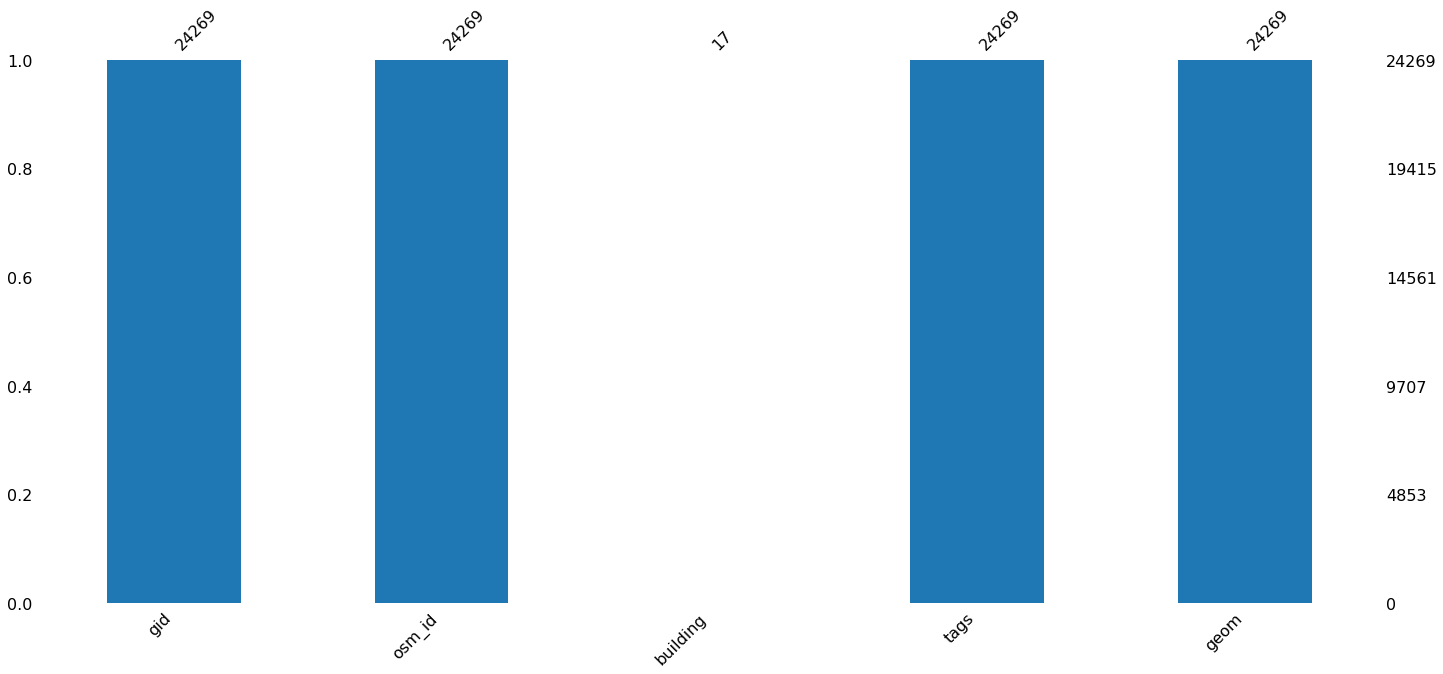

In [7]:
#visualization of the dataframe 
missingno.bar(df, color='tab:blue');

## 3. Plot a dataframe (geo plot)

<div class="alert alert-block alert-success">
Geoinformation can come in different representations. Two commons ways are `well known text` (WKT) and `well known binary` (WKB). We can convert these. In pandas to apply a change to every entity in a column we can use its apply function.
</div>

In [9]:
#Print the df geodataframe as table with geometry data
df.geom.head()

0    0101000000A1DF8BFDF3CF4E4164977A4B8BBC4741
1    01010000002E88B5554DD04E41924D89CB08BD4741
2    01010000002D707E6D88D04E418F055A445BBE4741
3    0101000000480E336F7CD04E41F1338C35EABB4741
4    010100000036CBB09F98D04E41A140A3C39EBC4741
Name: geom, dtype: object

In [10]:
# transform WKB to WKT / Geometry specially the geom column
df['geom'] = df['geom'].apply(lambda x:wkb.loads(x, hex=True))

The data of this table is encoded in the coordinate reference system UTM Zone 33 North. 

In [16]:
#Print the gdf geodataframe as table with geometry data
df.geom.head()

0    POINT (4038631.980831102 3111190.589678692)
1    POINT (4038810.669602416 3111441.590127655)
2    POINT (4038928.855421087 3112118.533997245)
3    POINT (4038904.868745599 3110868.418341153)
4     POINT (4038961.247582818 3111229.52841957)
Name: geom, dtype: object

<div class="alert alert-block alert-success">
Finally, let's plot our data!
</div>

</p>crs parameters can be changed depends on your source and location.</p> <br>
</p>At the following lines there are possibilities to set up the crs variable.</p> <br>
</p>WGS84 Latitude/Longitude: "EPSG:4326"</p> <br>
</p>UTM Zone 33 North: "EPSG:32633"</p> <br>

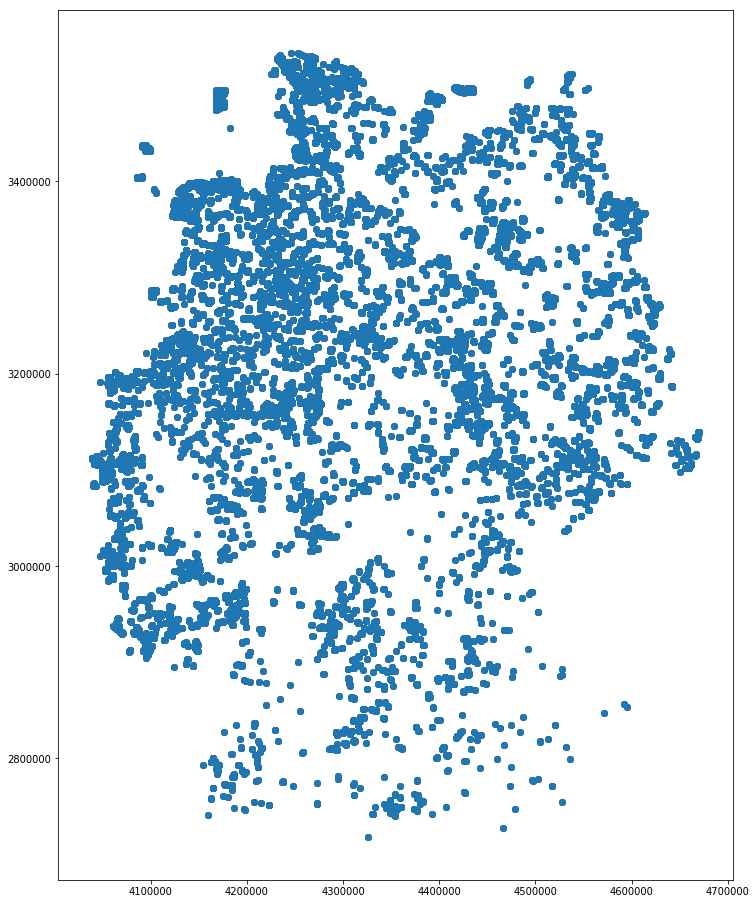

In [12]:
# geo plot data
crs = {'init' :'epsg:32633'}
gdf = gpd.GeoDataFrame(
                        df,# specifify your dataframe
                        crs=crs, # this is your coordinate system
                        geometry=df.geom # specify the geometry list we created
                        )
base1 = gdf.plot(color='white', edgecolor='black',figsize=(16,16))
gdf.plot(ax=base1, color='tab:blue')
plt.show()

In [13]:
# Show metadata for a specific (geo)dataframe.
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 24269 entries, 0 to 24268
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   gid       24269 non-null  int64 
 1   osm_id    24269 non-null  int64 
 2   building  17 non-null     object
 3   tags      24269 non-null  object
 4   geom      24269 non-null  object
 5   geometry  24269 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.1+ MB


## 4. Save Data

Geodataframes have a function to easily store in different file types. In the following we'll store the data in GeoJSON and geopackage.

In [14]:
# Convert the GeoDataFrame to GeoPackage and GeoJSON Format and save file 
# at the folder path "output_GeoData"
gdf.geometry.to_file("output_GeoData/example_geo_json.geojson", driver='GeoJSON')
gdf.geometry.to_file("output_GeoData/example_geopackage.gpkg", layer='data_example', driver="GPKG")